# 使用基于领域知识的特征对神经网络的多个分组模型进行训练

- 导入数据

In [1]:
# 导库
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression

In [2]:
# 一些参数
TEST_SIZE = 0.30
RANDOM_STATE = 42

In [3]:
# 导入数据
data = pd.read_csv('../../data/groups/clusters_electronic/data_cluster.csv')
data.head()
X_train = data[data['class'] == 'train']
X_test = data[data['class'] == 'test']
display(X_train.head())
display(X_test.head())
print(X_train.shape)
print(X_test.shape)

,space_group,band_gap,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,...,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster,class
0,164,3.8971,3.810445,42.690617,-1.928175,5.369542,2.132453,3.237090,20.0,53.0,...,139.0,176.0,37.0,151.333333,1.00,2.66,1.66,2.106667,6,train
1,122,2.0955,4.947128,23.865003,-2.385492,20.952346,13.461579,7.490766,16.0,59.0,...,105.0,203.0,98.0,145.857143,0.95,2.58,1.63,1.932857,6,train
2,225,3.0173,6.892776,14.371590,-3.590597,46.967161,42.005900,4.961261,8.0,73.0,...,66.0,215.0,149.0,116.600000,0.89,3.44,2.55,2.528000,7,train
3,225,1.4541,3.880169,32.606816,-1.744127,9.885204,6.939711,2.945493,17.0,82.0,...,102.0,244.0,142.0,138.444444,0.79,3.16,2.37,2.541111,7,train
4,15,2.5261,4.426263,10.875263,-2.371639,8.808742,5.420374,3.388368,8.0,32.0,...,66.0,141.0,75.0,91.800000,1.31,3.44,2.13,2.728000,3,train


,space_group,band_gap,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,...,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster,class
5093,160,0.7921,4.086507,10.994694,-2.019264,14.078999,6.862966,7.216033,3.0,25.0,...,66.0,139.0,73.0,93.230769,0.98,3.44,2.46,2.677692,9,test
5094,186,1.9661,5.059669,22.397666,-2.460065,23.198326,15.958896,7.239430,8.0,57.0,...,66.0,207.0,141.0,138.583333,1.10,3.44,2.34,2.072500,7,test
5095,14,0.8712,6.411909,23.332010,-1.547133,21.690907,11.098378,10.592529,29.0,57.0,...,120.0,207.0,87.0,144.750000,1.10,2.55,1.45,2.025000,8,test
5096,127,1.2992,2.349037,12.536103,-0.274379,37.388675,30.495613,6.893062,1.0,20.0,...,31.0,176.0,145.0,105.571429,0.98,2.55,1.57,1.832857,7,test
5097,5,1.6206,4.385036,25.392872,-0.587003,11.310439,3.828769,7.481670,13.0,47.0,...,107.0,145.0,38.0,120.000000,1.61,2.55,0.94,2.322000,3,test


(5093, 22)
(2184, 22)


In [4]:
# 移除不需要的列
X_train = X_train.drop(['class'], axis=1)
X_test = X_test.drop(['class'], axis=1)
display(X_train.head())
display(X_test.head())

,space_group,band_gap,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,...,MagpieData mean Number,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster
0,164,3.8971,3.810445,42.690617,-1.928175,5.369542,2.132453,3.237090,20.0,53.0,...,42.000000,139.0,176.0,37.0,151.333333,1.00,2.66,1.66,2.106667,6
1,122,2.0955,4.947128,23.865003,-2.385492,20.952346,13.461579,7.490766,16.0,59.0,...,31.428571,105.0,203.0,98.0,145.857143,0.95,2.58,1.63,1.932857,6
2,225,3.0173,6.892776,14.371590,-3.590597,46.967161,42.005900,4.961261,8.0,73.0,...,25.400000,66.0,215.0,149.0,116.600000,0.89,3.44,2.55,2.528000,7
3,225,1.4541,3.880169,32.606816,-1.744127,9.885204,6.939711,2.945493,17.0,82.0,...,32.666667,102.0,244.0,142.0,138.444444,0.79,3.16,2.37,2.541111,7
4,15,2.5261,4.426263,10.875263,-2.371639,8.808742,5.420374,3.388368,8.0,32.0,...,13.600000,66.0,141.0,75.0,91.800000,1.31,3.44,2.13,2.728000,3


,space_group,band_gap,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,...,MagpieData mean Number,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster
5093,160,0.7921,4.086507,10.994694,-2.019264,14.078999,6.862966,7.216033,3.0,25.0,...,12.769231,66.0,139.0,73.0,93.230769,0.98,3.44,2.46,2.677692,9
5094,186,1.9661,5.059669,22.397666,-2.460065,23.198326,15.958896,7.239430,8.0,57.0,...,29.750000,66.0,207.0,141.0,138.583333,1.10,3.44,2.34,2.072500,7
5095,14,0.8712,6.411909,23.332010,-1.547133,21.690907,11.098378,10.592529,29.0,57.0,...,38.500000,120.0,207.0,87.0,144.750000,1.10,2.55,1.45,2.025000,8
5096,127,1.2992,2.349037,12.536103,-0.274379,37.388675,30.495613,6.893062,1.0,20.0,...,8.857143,31.0,176.0,145.0,105.571429,0.98,2.55,1.57,1.832857,7
5097,5,1.6206,4.385036,25.392872,-0.587003,11.310439,3.828769,7.481670,13.0,47.0,...,29.400000,107.0,145.0,38.0,120.000000,1.61,2.55,0.94,2.322000,3


In [5]:
grouped_data = X_train.groupby('cluster')

In [6]:
def get_X_y(data_group):
    X = data_group.drop(columns=['e_total', 'e_ionic', 'e_electronic'])
    y = data_group['e_electronic']
    return X, y

- 搭建模型

In [7]:
# 加载数据
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets.to_numpy().reshape(-1, 1)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        # 根据索引获取数据和目标，并将它们转换为张量
        x = torch.tensor(self.data[index], dtype=torch.float32)
        y = torch.tensor(self.targets[index], dtype=torch.float32)
        return x, y
    


In [8]:
# 搭建神经网络
import torch.nn as nn
# 导入optim
import torch.optim as optim

class NN_model(nn.Module):
    def __init__(self):
        super(NN_model, self).__init__()
        
        # 使用Sequential定义神经网络的结构
        self.layers = nn.Sequential(
            nn.BatchNorm1d(18),
            nn.Linear(18, 12),
            nn.ReLU(),
            nn.Linear(12, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
            nn.Linear(4, 1)
        )
        
    def forward(self, x):
        # 前向传播
        return self.layers(x)

- 模型训练

In [9]:
def data_load(X, y):
    # 创建自定义数据集实例
    dataset = CustomDataset(X.to_numpy(), y)   # 注意X,y都为pandas.DataFrame
    # 创建数据加载器
    batch_size = 64
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return data_loader, dataset

def nn_train(data_loader, dataset, learning_rate, num_epochs):
    device = torch.device('cpu' if torch.cuda.is_available() else 'cpu')

    print(device)

    # 初始化模型、损失函数和优化器
    model = NN_model()
    # 使用均方误差作为损失函数
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    model.to(device)
    criterion.to(device)
    # 训练模型
    model.train()
    for epoch in range(num_epochs):
        # Forward pass
        epoch_loss = 0
        for i, (features, targets) in enumerate(data_loader):
            features = features.to(device)
            targets = targets.to(device)
            outputs = model(features)
            loss = criterion(outputs, targets)
            epoch_loss += loss.item()
            # Backward and optimize
            optimizer.zero_grad()    # 梯度重置
            loss.backward() # 向后传播计算梯度
            optimizer.step() # 通过梯度更新参数

        if (epoch+1) % 50 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, MSE: {epoch_loss/len(dataset):.4f}')

    return model



In [10]:
def plot_cross_val_scores(mse, mae, y_hat, y_train):
    '''绘制交叉验证的结果'''
    print(f'MSE: {mse}, MAE: {mae}')

    # 绘制parity plot
    fig, ax = plt.subplots(dpi=300)
    ax.scatter(y_train, y_hat, s=1)
    ax.plot(y_train, y_train, c='k', zorder=-5)
    ax.set_xlabel('Actual $\epsilon_{electronic}$')
    ax.set_ylabel('Predicted $\epsilon_{electronic}$')
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 50)
    plt.show()

In [11]:
# 对每个group进行训练
nn_models = {}
for group, data_group in grouped_data:
    # 仅训练数据量超过400个的
    if len(data_group) < 400:
        continue
    print(f"-------------cluster {group}-------------")
    X, y = get_X_y(data_group)
    # 加载数据
    data_loader, dataset = data_load(X, y)
    model = nn_train(data_loader, dataset, learning_rate=0.0015, num_epochs=1000)
    nn_models[group] = model

-------------cluster 3-------------
cpu
Epoch [50/1000], Loss: 2901.2194, MSE: 1.8479
Epoch [100/1000], Loss: 2728.7794, MSE: 1.7381
Epoch [150/1000], Loss: 2627.1687, MSE: 1.6734
Epoch [200/1000], Loss: 2590.4706, MSE: 1.6500
Epoch [250/1000], Loss: 2576.2795, MSE: 1.6409
Epoch [300/1000], Loss: 2532.3868, MSE: 1.6130
Epoch [350/1000], Loss: 2515.0975, MSE: 1.6020
Epoch [400/1000], Loss: 2398.3318, MSE: 1.5276
Epoch [450/1000], Loss: 2372.8206, MSE: 1.5114
Epoch [500/1000], Loss: 2195.0343, MSE: 1.3981
Epoch [550/1000], Loss: 2221.6031, MSE: 1.4150
Epoch [600/1000], Loss: 2224.0468, MSE: 1.4166
Epoch [650/1000], Loss: 2128.3166, MSE: 1.3556
Epoch [700/1000], Loss: 2322.1908, MSE: 1.4791
Epoch [750/1000], Loss: 2095.9811, MSE: 1.3350
Epoch [800/1000], Loss: 2130.5584, MSE: 1.3570
Epoch [850/1000], Loss: 2053.5063, MSE: 1.3080
Epoch [900/1000], Loss: 2099.8417, MSE: 1.3375
Epoch [950/1000], Loss: 2048.7576, MSE: 1.3049
Epoch [1000/1000], Loss: 2110.2836, MSE: 1.3441
-------------cluster

### 模型测试

In [12]:
# 模型测试
def model_test(X_test, models):
    X_test_copy = X_test.copy()
    y_preds = []
    for index, test_item in X_test_copy.iterrows():
        cluster = test_item['cluster']
        if cluster not in models.keys():
            y_preds.append(None)
            continue
        X_item = test_item.drop(['e_total', 'e_ionic', 'e_electronic'])
        models[cluster].eval()
        y_pred = models[cluster](torch.tensor(pd.DataFrame(X_item).T.to_numpy(), dtype=torch.float32))
        y_preds.append(y_pred[0].item())
        # print(f'Cluster: {cluster}, Predicted e_electronic: {y_pred[0]}')
        
    X_test_copy['e_electronic_pred'] = y_preds
    X_test_copy.dropna(axis=0, inplace=True)
    mse = mean_squared_error(X_test_copy['e_electronic'], X_test_copy['e_electronic_pred'])
    mae = mean_absolute_error(X_test_copy['e_electronic'], X_test_copy['e_electronic_pred'])
    plot_cross_val_scores(mse, mae, X_test_copy['e_electronic_pred'], X_test_copy['e_electronic'])

    return y_preds, mse, mae

MSE: 154.96325949667326, MAE: 7.053884383664189


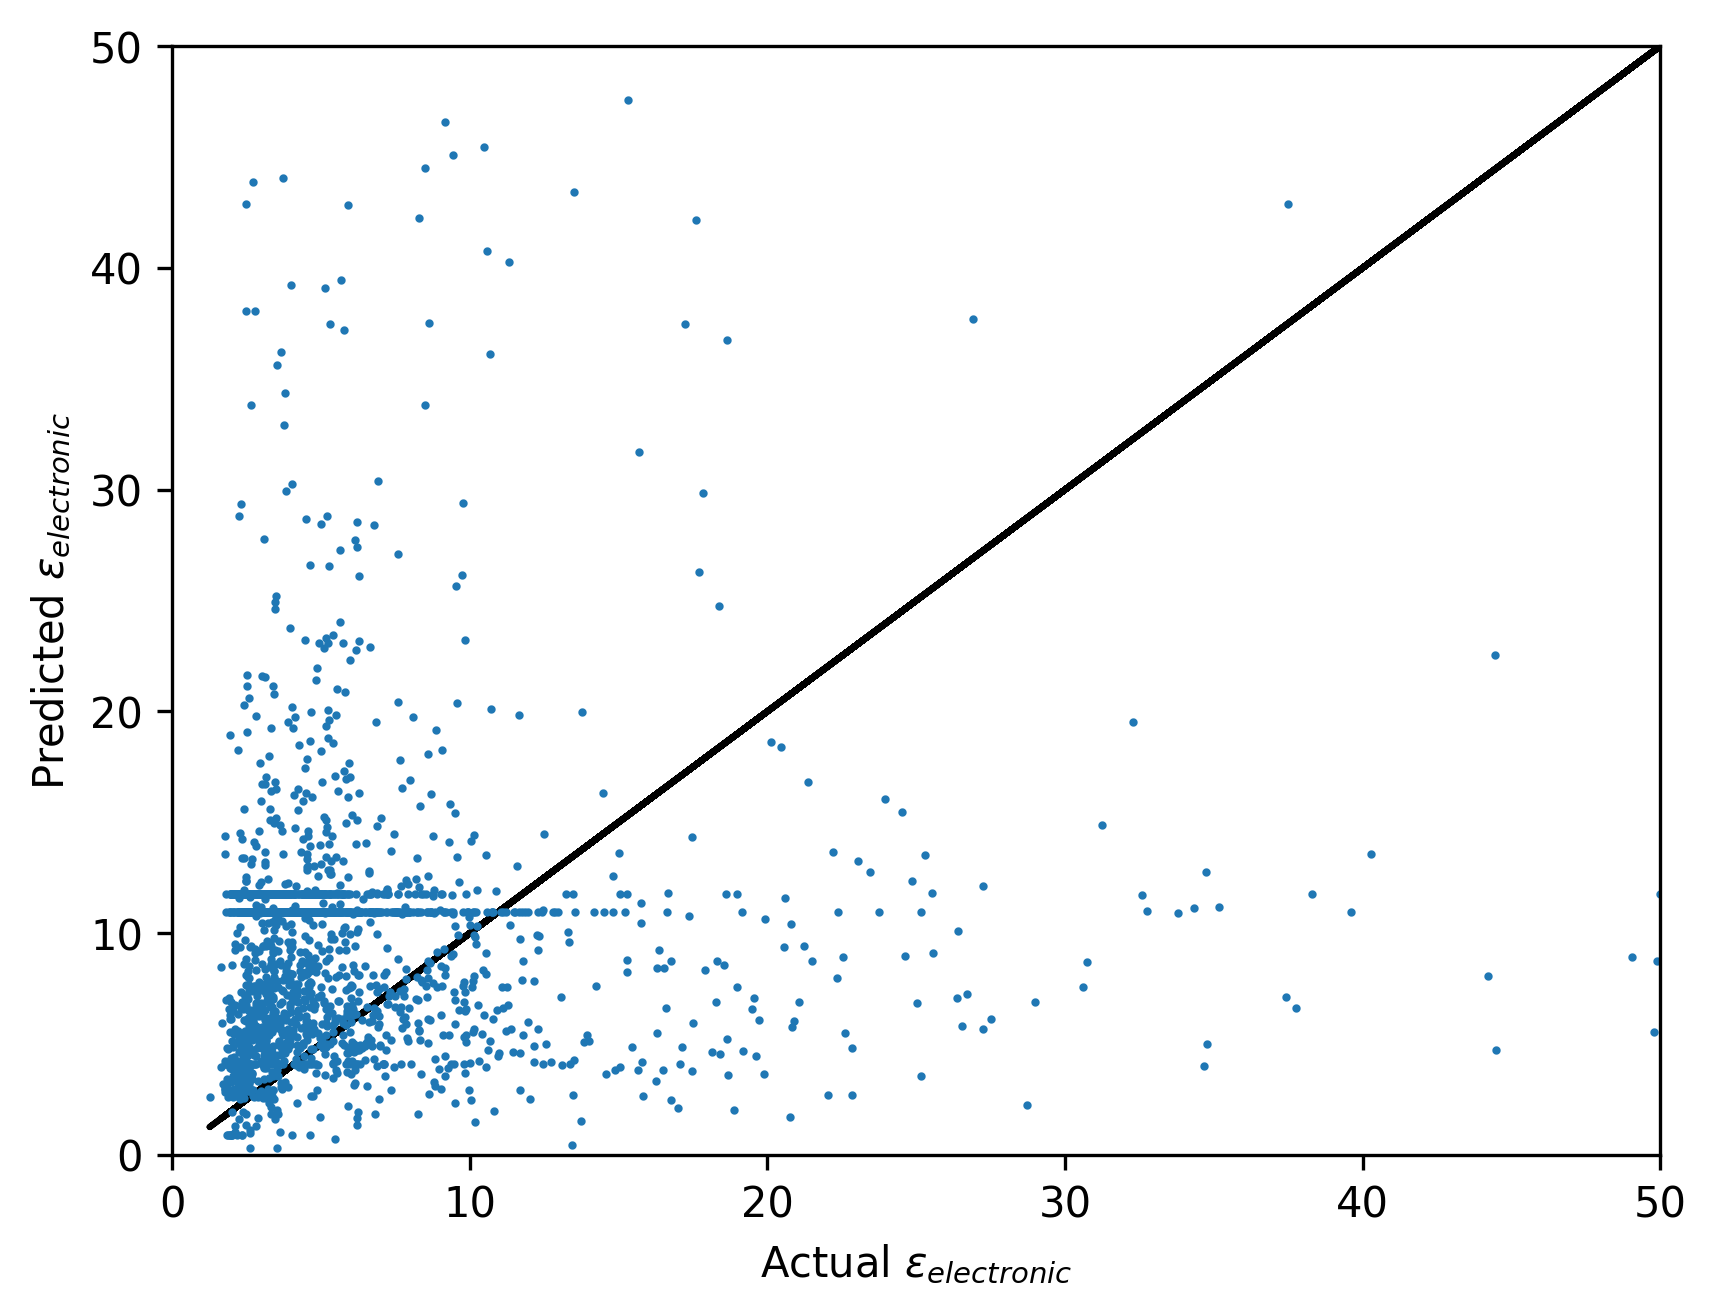

In [13]:
y_hat, mse, mae = model_test(X_test, nn_models)